In [16]:
import time
import random
from collections import deque
from pyvis.network import Network
from IPython.display import Image
from api import get_forward_links, get_backward_links

In [9]:
def visualize_graph(start_article, end_article, path, connection_point, adj=10):
    net = Network(notebook=True, cdn_resources='remote')  # or 'in_line'
    net.force_atlas_2based()
    connection_index = path.index(connection_point)

    # Add main path nodes first
    for i in range(len(path)):
        node = path[i]
        color = 'green' if node == connection_point else 'blue' if i <= connection_index else 'red'
        net.add_node(node, color=color, title=node)

    # Add main path edges second
    for i in range(len(path) - 1):
        source = path[i]
        target = path[i + 1]
        edge_color = 'blue' if i < connection_index else 'red'
        net.add_edge(source, target, color=edge_color)

    # Add alternative paths
    for i in range(len(path)):
        if path[i] == connection_point:
            continue
        elif i < connection_index:  # Forward links
            links = get_forward_links(path[i])
        else:  # Backward links
            links = get_backward_links(path[i])

        # Randomly select up to 50 links
        links_to_add = random.sample(list(links), min(adj, len(links))) # adjust adjacent node count
        for link in links_to_add:
            net.add_node(link, title=link)
            # Use a different color for alternative paths
            net.add_edge(path[i], link, color='grey')

    net.show("modelgraph.html")


In [3]:
def bidirectional_search(start_article, end_article):
    start_time = time.time()
    start_queue = deque([(start_article, [start_article])])
    end_queue = deque([(end_article, [end_article])])
    start_visited = {start_article}
    end_visited = {end_article}
    start_paths = {start_article: [start_article]}
    end_paths = {end_article: [end_article]}
    counter = 2  # Include starting and ending article

    while start_queue and end_queue:
        start_article, start_path = start_queue.popleft()
        start_links = get_forward_links(start_article)

        for link in start_links:
            if link not in start_visited:
                new_path = start_path + [link]
                counter += 1
                start_queue.append((link, new_path))
                start_visited.add(link)
                start_paths[link] = new_path

                if link in end_visited:
                    end_path = end_paths[link]
                    end_time = time.time()
                    return (start_path + end_path, link, len(start_path + end_path), counter, end_time - start_time)

        end_article, end_path = end_queue.popleft()
        end_links = get_backward_links(end_article)

        for link in end_links:
            if link not in end_visited:
                new_path = [link] + end_path
                counter += 1
                end_queue.append((link, new_path))
                end_visited.add(link)
                end_paths[link] = new_path

                if link in start_visited:
                    start_path = start_paths[link]
                    end_time = time.time()
                    return (start_path + end_path, link, len(start_path + end_path), counter, end_time - start_time)

    return None

In [4]:
start_article = "Sherlock Holmes"
end_article = "The Legend of Zelda: Majora's Mask"
result_path, connection, result_path_length, links, time_taken = bidirectional_search(start_article, end_article)

In [5]:
formatted_result_path = ' → '.join(result_path)
formatted_result = f"Start article: {start_article}\n" \
                   f"End article: {end_article}\n" \
                   f"Path: {formatted_result_path}\n" \
                   f"Connection Point: {connection}\n" \
                   f"Path length: {result_path_length}\n" \
                   f"Number of links visited: {links}\n" \
                   f"Time taken: {time_taken} seconds"

print(formatted_result)

Start article: Sherlock Holmes
End article: The Legend of Zelda: Majora's Mask
Path: Sherlock Holmes → Hugo Award → Parallel universes in fiction → The Legend of Zelda: Majora's Mask
Connection Point: Parallel universes in fiction
Path length: 4
Number of links visited: 4270
Time taken: 33.66091799736023 seconds


In [10]:
visualize_graph(start_article, end_article, result_path, connection, adj=10)

modelgraph.html


Check the `modelgraph.html` file for the visualization. Here's an example of what it should look like:

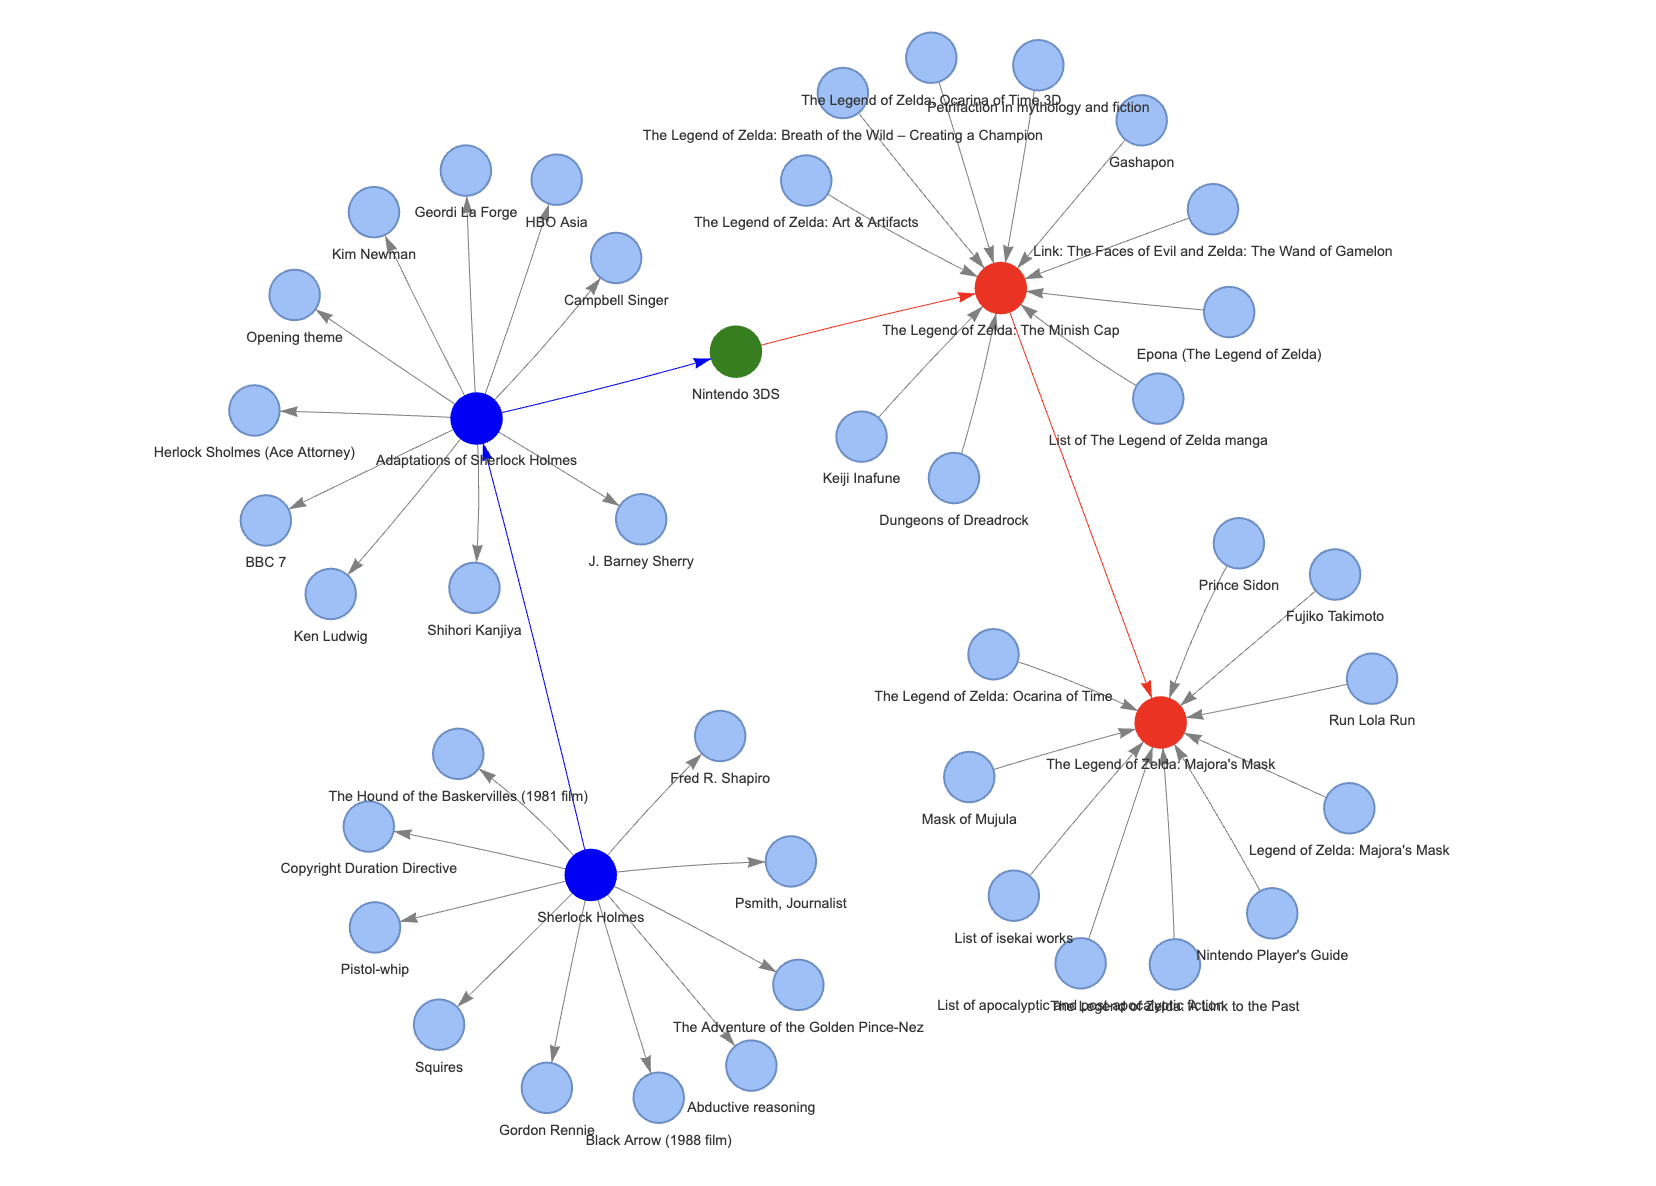

In [15]:
Image(filename='wikipathss.png')